                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

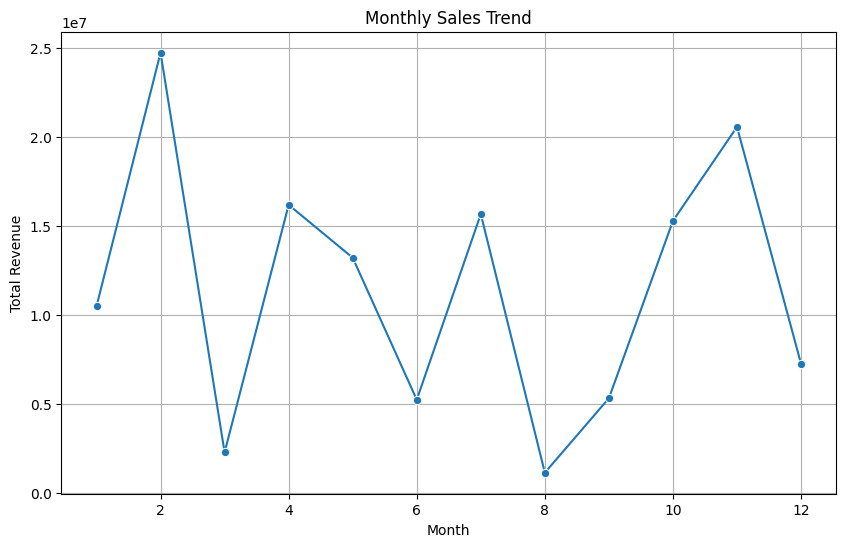

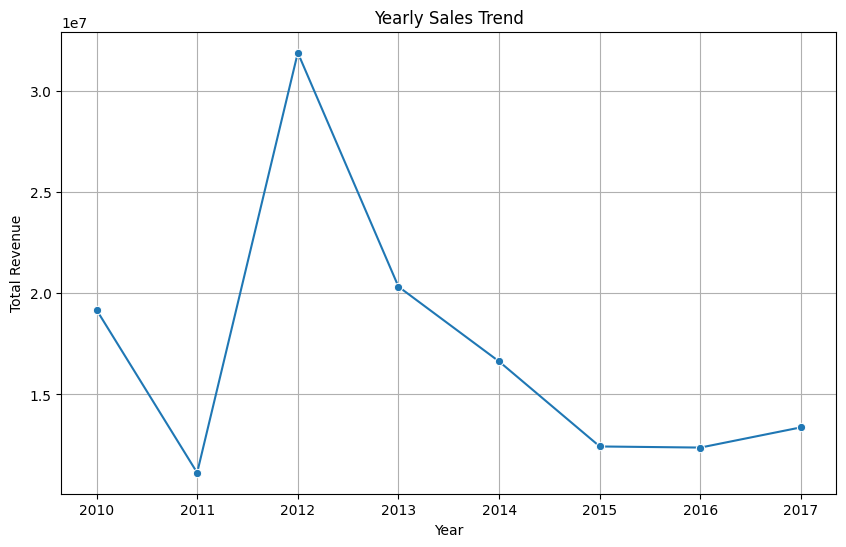

           Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
count  1.000000e+02   100.000000  100.000000  100.000000   1.000000e+02   
mean   5.550204e+08  5128.710000  276.761300  191.048000   1.373488e+06   
std    2.606153e+08  2794.484562  235.592241  188.208181   1.460029e+06   
min    1.146066e+08   124.000000    9.330000    6.920000   4.870260e+03   
25%    3.389225e+08  2836.250000   81.730000   35.840000   2.687212e+05   
50%    5.577086e+08  5382.500000  179.880000  107.275000   7.523144e+05   
75%    7.907551e+08  7369.000000  437.200000  263.330000   2.212045e+06   
max    9.940222e+08  9925.000000  668.270000  524.960000   5.997055e+06   

         Total Cost  Total Profit  Order Month   Order Year  
count  1.000000e+02  1.000000e+02   100.000000   100.000000  
mean   9.318057e+05  4.416820e+05     6.260000  2013.230000  
std    1.083938e+06  4.385379e+05     3.353334     2.088231  
min    3.612240e+03  1.258020e+03     1.000000  2010.000000  
25%    1.68868

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Amazon Sales data.csv")

# Display the first few rows to understand the structure of the dataset
print(df.head())

# Check for missing values and data types
print(df.info())

# Convert 'Total Revenue' column to numeric, handling errors
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

# Remove rows with missing 'Total Revenue' values
df = df.dropna(subset=['Total Revenue'])

# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month and year from 'Order Date' column
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Year_Month'] = df['Order Date'].dt.to_period('M')

# Sales trend month-wise
monthly_sales = df.groupby('Order Month')['Total Revenue'].sum()

# Sales trend year-wise
yearly_sales = df.groupby('Order Year')['Total Revenue'].sum()

# Sales trend yearly_month-wise
yearly_monthly_sales = df.groupby('Year_Month')['Total Revenue'].sum()

# Key metrics
key_metrics = df.describe()

# Visualizations
# Monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Yearly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Key metrics
print(key_metrics)
